In [6]:
from fastai.vision.all import *
import os

In [2]:
SAMPLE_FILENAME="sample.txt"
SAMPLE_DATA = None
PBM_DIR = r"C:\Work\Sources\fai\pbm_sample"
PNG_DIR = r"C:\Work\Sources\fai\png_sample"

In [3]:
with open(SAMPLE_FILENAME, "r") as sf :
    SAMPLE_DATA = sf.readlines()

In [4]:
files = get_image_files(PNG_DIR)

In [5]:
files

(#10000) [Path('C:/Work/Sources/fai/png_sample/sf_0.png'),Path('C:/Work/Sources/fai/png_sample/sf_1.png'),Path('C:/Work/Sources/fai/png_sample/sf_10.png'),Path('C:/Work/Sources/fai/png_sample/sf_100.png'),Path('C:/Work/Sources/fai/png_sample/sf_1000.png'),Path('C:/Work/Sources/fai/png_sample/sf_1001.png'),Path('C:/Work/Sources/fai/png_sample/sf_1002.png'),Path('C:/Work/Sources/fai/png_sample/sf_1003.png'),Path('C:/Work/Sources/fai/png_sample/sf_1004.png'),Path('C:/Work/Sources/fai/png_sample/sf_1005.png'),Path('C:/Work/Sources/fai/png_sample/sf_1006.png'),Path('C:/Work/Sources/fai/png_sample/sf_1007.png'),Path('C:/Work/Sources/fai/png_sample/sf_1008.png'),Path('C:/Work/Sources/fai/png_sample/sf_1009.png'),Path('C:/Work/Sources/fai/png_sample/sf_101.png'),Path('C:/Work/Sources/fai/png_sample/sf_1010.png'),Path('C:/Work/Sources/fai/png_sample/sf_1011.png'),Path('C:/Work/Sources/fai/png_sample/sf_1012.png'),Path('C:/Work/Sources/fai/png_sample/sf_1013.png'),Path('C:/Work/Sources/fai/png_s

In [19]:
def label_func(fname):
#    print(f"{fname=}")
    entry = os.path.split(fname)[1]
    entry = entry.split(".")[0].split("_")[1]
    entry = int(entry)
#    print(f"{entry=}")
    line = SAMPLE_DATA[entry]
#    print(f"{line=}")
    k = line.split(",")[2]
#    print(f"{k=}")
    #lsb of key
    b = bytes.fromhex(k)[0] & 1
#    print(f"{b=}")
    return "1" if b == 1 else "0"

In [14]:
label_func(r'C:/Work/Sources/fai/png_sample/sf_101.png')

fname='C:/Work/Sources/fai/png_sample/sf_101.png'


'0'

In [24]:
dls = DataBlock(blocks=(ImageBlock, CategoryBlock), get_items=get_image_files, splitter=RandomSplitter(valid_pct=0.2, seed=42),
                get_y=label_func).dataloaders(PNG_DIR)

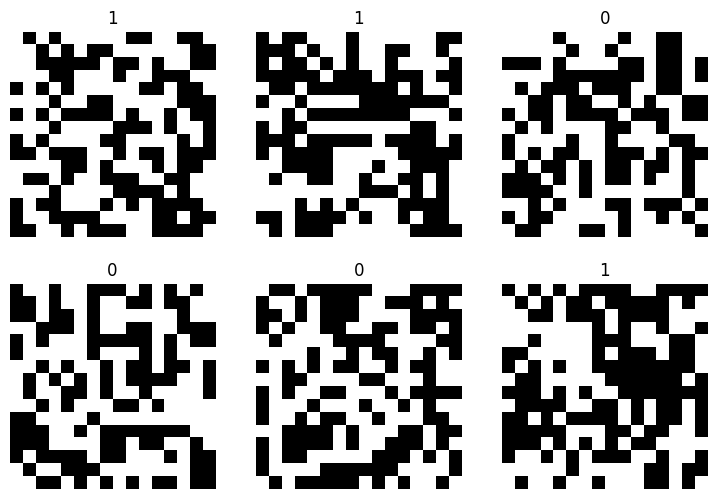

In [25]:
dls.show_batch(max_n=6)

In [26]:
learn = vision_learner(dls, resnet18, metrics=error_rate)

In [27]:
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,1.092436,0.864258,0.506500,00:12


epoch,train_loss,valid_loss,error_rate,time
0,0.811564,0.747756,0.495500,00:45
1,0.740974,0.715742,0.511000,00:45
2,0.700321,0.710856,0.502000,00:44


In [28]:
value,_,probs = learn.predict(PILImage.create("C:/Work/Sources/fai/png_sample/sf_5621.png"))

In [29]:
print(value)
print(probs)

1
tensor([0.3342, 0.6658])
